# **Ridge Regression :**

Problem Statement:
1. Consider any dataset. You can create own or use any publicly available dataset. Pretend
the goal is to predict the target variable.

    (a) Run Ridge Regression on the data:
        i. Find the λ value that minimizes the cross validated error/training error.
        ii. Provide plots for both the cross validated error/training error and the coefficients
        as functions of λ .

 This is an implementation of ridge regression (aka L2-regularized regression or Tikhonov regression) that takes advantage of some linear algebra tricks to do very efficient cross validation. This method is particularly useful when the number of models that you are trying to fit simultaneously is very large (thousands to tens of thousands), the number of features is very large (thousands), and the number of data points for each model is very large (thousands).

 Determine the percentage of sales from the advertisement of 3 different types of products i.e TV, Radio and newspaper. Our goal here is to implement ridge regression (L2 regularization) in order to predict the percentage of advertisement.
 The above dataset has been taken from Kaggle and is publically available.

  The dataset contains 4 columns and 200 rows with CSV extension. The data      contains the following columns :
  1. 'TV': Advertisement percentage of TV
  2. 'radio': Advertisement percentage of Radio.
  3. 'newspaper': Advertise percentage of Newspaper
  4.  'sales' : Sales percentage.


First we will import the necessary libraray packages for this assignement

In [28]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV

%matplotlib inline

Now we will load the dataset and view it

In [29]:
df = pd.read_csv('/content/Advertising.csv')

In [30]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [31]:
df = df.drop('Unnamed: 0', axis=1) # returns the features of Advertising.csv

## Data exploration and pre-processing:

Now we will do some data exploration and will preprocess our data if it is required.

In [32]:
df.describe() # Returns the descriptions of every feature

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [34]:
df.isna().sum() # This function checks if we have any NA or missing value in our data set or not

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

## Train and test set splitting:

Now we will split the loaded advertising dataset into train and test set in 70:30 ratio. We will use train_test_split() from sklearn library package to do the splitting. Also we will use an attribute "random_state" so that the results are reproducible, that is every time we run the code, the same instances will be included in the training and testing sets respectively. Below is the code.

In [35]:
X = df[['TV', 'radio', 'newspaper']]
y = df['sales']

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=25)

In [37]:
X_train.shape

(140, 3)

In [38]:
X_test.shape

(60, 3)

## Implementing L2 regularization:

Now we will train our training dataset by Ridge regression algorithm. This is present in sklearn package and hence we will import the necessary packages as coded below. Required functions are used to design the predictive model.

For more details and documentaton visit: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

In [39]:
np.linspace(10,-2,100)

array([10.        ,  9.87878788,  9.75757576,  9.63636364,  9.51515152,
        9.39393939,  9.27272727,  9.15151515,  9.03030303,  8.90909091,
        8.78787879,  8.66666667,  8.54545455,  8.42424242,  8.3030303 ,
        8.18181818,  8.06060606,  7.93939394,  7.81818182,  7.6969697 ,
        7.57575758,  7.45454545,  7.33333333,  7.21212121,  7.09090909,
        6.96969697,  6.84848485,  6.72727273,  6.60606061,  6.48484848,
        6.36363636,  6.24242424,  6.12121212,  6.        ,  5.87878788,
        5.75757576,  5.63636364,  5.51515152,  5.39393939,  5.27272727,
        5.15151515,  5.03030303,  4.90909091,  4.78787879,  4.66666667,
        4.54545455,  4.42424242,  4.3030303 ,  4.18181818,  4.06060606,
        3.93939394,  3.81818182,  3.6969697 ,  3.57575758,  3.45454545,
        3.33333333,  3.21212121,  3.09090909,  2.96969697,  2.84848485,
        2.72727273,  2.60606061,  2.48484848,  2.36363636,  2.24242424,
        2.12121212,  2.        ,  1.87878788,  1.75757576,  1.63

In [40]:
lambda_values = 10**np.linspace(10,-2,100)*0.5

In [41]:
ridge_model = Ridge()
coefficients = []

for i in lambda_values:
    ridge_model.set_params(alpha = i)
    ridge_model.fit(X_train, y_train)
    coefficients.append(ridge_model.coef_)

Once we have fit our model, now we will proceed to prediction

In [42]:
Pred=ridge_model.predict(X_test)

In [43]:
Pred

array([12.1537707 , 13.89114601, 10.15171943, 18.5424108 , 23.42138356,
       10.41035362, 21.21027486, 16.50906541, 17.30666887, 21.289549  ,
       14.44455131, 19.15198711, 14.89476223, 17.90910296, 13.84116651,
       20.15718086,  6.60139723, 18.21914562, 15.45453712, 14.86670544,
       13.83400106, 15.0392192 , 14.136506  , 21.97239119,  3.53192344,
       15.29073274, 11.65608927,  9.7553759 , 17.36471956, 19.59466709,
       21.36420641, 24.9448545 , 11.37072509, 10.52347565, 14.96150546,
       10.68999831,  8.68800598, 17.91316697, 14.01063716, 18.27112241,
       14.41014677, 21.84766873, 21.85996656,  5.3459776 , 11.69928906,
        5.97717656, 12.16707129, 12.38307006,  8.14853566, 14.06472257,
        7.63286805,  9.13957782, 13.49973597, 15.54708478,  7.03268084,
       15.2186676 , 12.92967473,  9.82438778,  3.67624909, 19.7506337 ])

In [44]:
ridge_model.score(X_train,y_train) # Calculation of accuracy score on training data

0.8981488993764916

In [45]:
ridge_model.score(X_test,y_test) # Calculation of accuracy score on test data

0.8926677733904751

## Calucation of λ:

Now after successful implementation of L2 regularization, let us calucalate the value of λ that minimizes the cross validated error/training error. λ is one of the hyperparameter that regulates the penalty over coffecients in ridge regression. Since the goal of ridge method is to eliminate overfitting from the predicted model, so it becomes very important that we fine tune our hyperparameter λ in order to mininmize cross validation/training error.



In [46]:
ridge_model.coef_

array([ 0.04704043,  0.18617896, -0.00160583])

In [47]:
ridge_model.intercept_

2.882331381287667

In [48]:
lambda_values_1 = np.random.randint(0,500,100)

In [49]:
lambda_values_1

array([117, 120, 282,  52, 220, 197,  55, 143, 140, 176, 475, 497, 457,
       180, 439, 374, 192, 449, 214, 237, 162, 471, 123, 143,  25,  70,
       118, 165, 288, 342, 225, 301, 170, 271, 211,  28,  95,  19, 392,
       422, 352, 453, 393, 193, 237, 263, 196, 340, 459, 471, 122,  80,
       286, 413, 397, 220, 285,  86, 304,  90, 141, 269, 225,   7, 119,
       474,  81, 192, 423, 484, 497, 340, 415, 437, 448, 128, 386, 288,
       280, 291,  57, 365, 117, 158,  17, 251, 319, 292, 438, 455,  57,
       347, 370, 126, 474,  69, 364,  16, 119, 389])

In [50]:
CV_model = RidgeCV(alphas = lambda_values_1, scoring = "neg_mean_squared_error", cv = 10)
CV_model.fit(X_train, y_train)

RidgeCV(alphas=array([117, 120, 282,  52, 220, 197,  55, 143, 140, 176, 475, 497, 457,
       180, 439, 374, 192, 449, 214, 237, 162, 471, 123, 143,  25,  70,
       118, 165, 288, 342, 225, 301, 170, 271, 211,  28,  95,  19, 392,
       422, 352, 453, 393, 193, 237, 263, 196, 340, 459, 471, 122,  80,
       286, 413, 397, 220, 285,  86, 304,  90, 141, 269, 225,   7, 119,
       474,  81, 192, 423, 484, 497, 340, 415, 437, 448, 128, 386, 288,
       280, 291,  57, 365, 117, 158,  17, 251, 319, 292, 438, 455,  57,
       347, 370, 126, 474,  69, 364,  16, 119, 389]),
        cv=10, scoring='neg_mean_squared_error')

In [51]:
CV_model.alpha_

342

In [52]:
CV_model.score(X_train,y_train)

0.8981077707002257

In [53]:
CV_model.score(X_test,y_test)

0.892327163981148

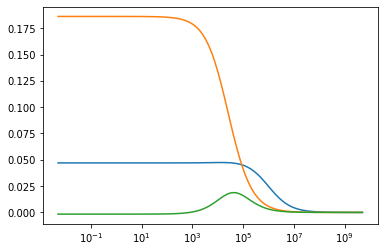

In [54]:
ax = plt.gca()
ax.plot(lambda_values, coefficients) 
ax.set_xscale("log")